In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
dt=.004
dx=dz=1
nt=nz=120
ntr=80 
nx=ntr
c=250

In [3]:
files = []

for i in range(0,80,1):
    filename = 'Data/CSG/gather_shot{}'.format(i)
    
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

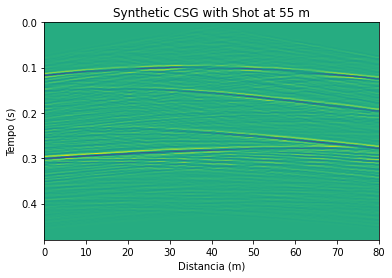

In [4]:
shot = files[40]

plt.imshow(shot,aspect='auto',extent=[0, nx*dx, nt*dt, 0])

plt.title('Synthetic CSG with Shot at 55 m')
plt.xlabel('Distancia (m)')
plt.ylabel('Tempo (s)')
plt.show()

288
288


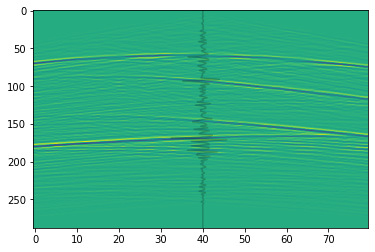

In [5]:
trace = shot[:,40]+40
t = np.arange(0,len(trace))

print(len(trace))
print(len(t))

plt.imshow(shot, aspect="auto")
plt.plot(trace,t,"k",alpha=.2)
plt.show()

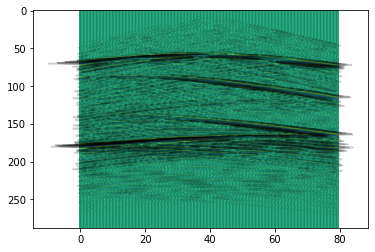

In [6]:
#trace = shot[:,40]+40
t = np.arange(0,len(trace))

plt.imshow(shot, aspect="auto")

traces = []
for i in range(0,len(shot[1])):
    trace = (shot[:,i]+i)
    traces.append(trace)
    plt.plot(trace,t,"k",alpha=.2)
    


In [7]:
from scipy.fft import rfft, rfftfreq, irfft
import cmath

In [8]:
shot = files[40] #files contem todos os gathers, escolhi o arquivo do tiro 40
trace = shot[:,40] #selecionando o traço central

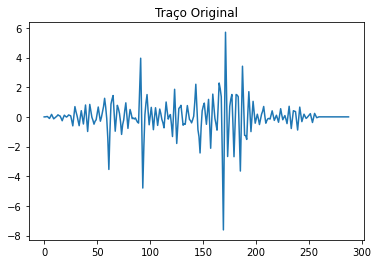

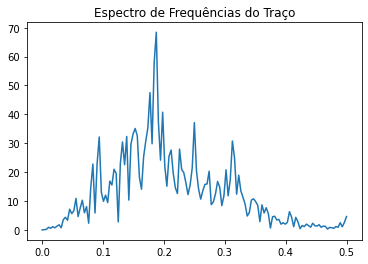

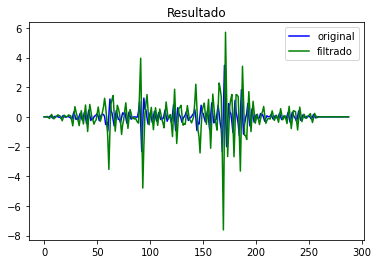

In [9]:
plt.plot(trace)
plt.title("Traço Original")
plt.show()

fft_trace = rfft(trace) #transformada do nosso traço
freq = rfftfreq(len(trace)) #bins de frequência

plt.plot(freq,np.abs(fft_trace))
plt.title("Espectro de Frequências do Traço")
plt.show()

fft_new = []
for count,i in enumerate(freq): #aqui faço a multiplicação por raiz de omega
    w = i
    f = 1j*np.sqrt(w)*fft_trace[count]
    fft_new.append(f)

new = irfft(fft_new) #transformada inversa, voltando para o tempo

plt.plot(new,"b",label="original")
plt.plot(trace,"g",label="filtrado")
plt.title("Resultado")
plt.legend()
plt.show()

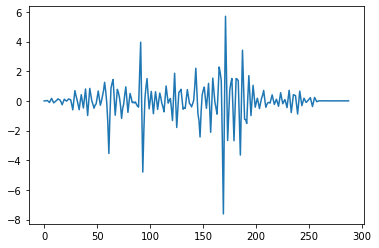

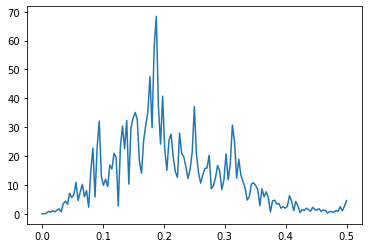

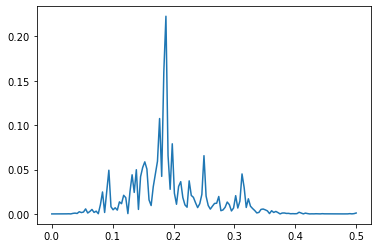

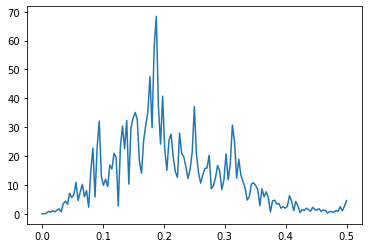

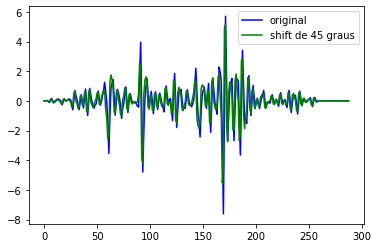

In [10]:
#testando outra abordagem pra ver se os resultados são parecidos...
#a ideia é um phase shift de 45 graus ou pi/4

plt.plot(trace)
plt.show()

signalFFT = rfft(trace)
fftFreq = rfftfreq(len(trace))

plt.plot(fftFreq,np.abs(signalFFT))
plt.show()

## Get Power Spectral Density
signalPSD = np.abs(signalFFT) ** 2
signalPSD /= len(signalFFT)**2

plt.plot(fftFreq, signalPSD)
plt.show()

## Get Phase
signalPhase = np.angle(signalFFT)

## Phase Shift the signal +45 degrees
newSignalFFT = signalFFT * cmath.rect( 1., np.pi/4 )

plt.plot(fftFreq,np.abs(newSignalFFT))
plt.show()

## Reverse Fourier transform
newSignal = irfft(newSignalFFT)

plt.plot(trace,"b",label="original")
plt.plot(newSignal,"g",label="shift de 45 graus")
plt.legend()
plt.show()

In [44]:
def phase_shift(gather):
    """
    Realiza a meia-derivada (phase-shift de 45 graus) para os traços sísmicos de um gather.
    Entrada:
    gather - dado sísmico (nt,ntr)
    Saída:
    phase_gather - dado sísmico após phase-shift em todos os traços (nt,ntr)
    """
    phase_gather = gather.copy()
    n_traces = shot.shape[-1]
    
    for i in range(n_traces):
        trace = gather[:,i] #selecionando cada traço dentro do gather
        
        signalFFT = rfft(trace) #passando o traço pro domínio da frequência
        #fftFreq = rfftfreq(len(trace)) #bins de frequência para plotar (eixo w) 
        
        signalPSD = np.abs(signalFFT) ** 2
        signalPSD /= len(signalFFT)**2

        signalPhase = np.angle(signalFFT) #fase do traço
        newSignalFFT = signalFFT * cmath.rect( 1., np.pi/4 ) #Phase Shift de 45 graus 

        newSignal = irfft(newSignalFFT) #voltando para o domínio do tempo
        
        phase_gather[:,i] = newSignal
        
    return phase_gather

In [45]:
phase_gather_1 = phase_shift(shot)

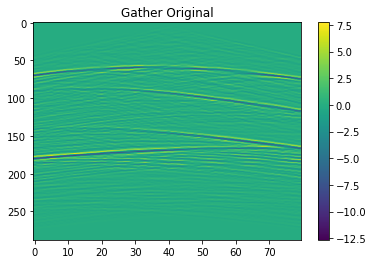

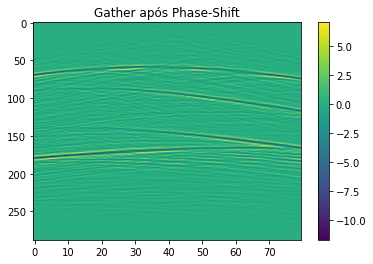

In [67]:
plt.imshow(shot, aspect="auto")
plt.title("Gather Original")
plt.colorbar()
plt.show()

plt.imshow(phase_gather_1, aspect="auto")
plt.title("Gather após Phase-Shift")
plt.colorbar()
plt.show()

*******

## Testando a migração

In [52]:
import MigPreFuncoes

Imported MigPreFuncoes now


In [53]:
with open('Data/raiosSlantStack.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

TTh.shape=(80, 120, 80)


In [55]:
dt=0.004
#shot_number = 40
win=20*dt
dwin=dt
app=15
isx=40

In [58]:
with open("Data/CSG/janela", "rb") as f:
    tst = np.load(f)
    
m_theta = np.degrees(np.arctan(tst))    
X = np.cos(m_theta) 
Y = np.sin(m_theta)

In [63]:
mig_winapp = MigPreFuncoes.migvsp_winapp(phase_gather_1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y)

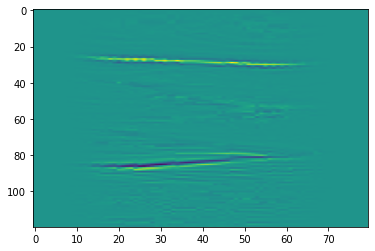

In [64]:
plt.imshow(mig_winapp, aspect="auto")
plt.show()

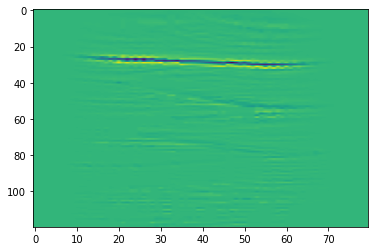

In [66]:
mig_diff = MigPreFuncoes.migvsp_winapp_diff(phase_gather_1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y)

plt.imshow(mig_diff, aspect="auto")
plt.show()